In [5]:
import tensorflow as tf

if tf.test.is_built_with_cuda():
    print("CUDA is available.")
    
    gpus = tf.config.experimental.list_physical_devices('GPU')
    num_gpus = len(gpus)
    print(f"Number of GPUs available: {num_gpus}")

    for i, gpu in enumerate(gpus):
        print(f"GPU {i}: {gpu}")
else:
    print("CUDA is not available.")

CUDA is available.
Number of GPUs available: 1
GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Import Library

In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Data Splitting

In [1]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split

class DatasetDivision:
    def __init__(self, root_dir="", output_dir=""):
        self.root_dir = root_dir
        self.output_dir = output_dir
        print("Instance of the class created")

    def printnow(self, new_dir):
        print("Just testing that the method calling is working " + new_dir)

    def divide_dataset(self, root_dir, output_dir):
        self.root_dir = root_dir
        self.output_dir = output_dir

        if not os.path.exists(self.output_dir):
            os.mkdir(self.output_dir)
        for split in ['train', 'val', 'test']:
            split_dir = os.path.join(self.output_dir, split)
            if not os.path.exists(split_dir):
                os.mkdir(split_dir)

        class_folders = os.listdir(root_dir)
        print(f"Class folders found: {class_folders}")

        for class_folder in class_folders:
            class_path = os.path.join(root_dir, class_folder)
            cropped_dir = os.path.join(class_path, 'CROPPED')

            if not os.path.exists(cropped_dir):
                print(f"Warning: The 'CROPPED' folder does not exist in {class_path}")
                continue

            class_files = glob.glob(os.path.join(cropped_dir, '*.bmp'))
            print(f"Found {len(class_files)} images in {cropped_dir}")

            if len(class_files) == 0:
                print(f"No images found in {cropped_dir}. Skipping this class.")
                continue

            # Pembagian pertama: Pisahkan 15% untuk pengujian, 85% untuk pelatihan dan validasi
            train_and_valid, test = train_test_split(class_files, test_size=0.15, random_state=42)

            # Pembagian kedua: Dari 85% yang tersisa, bagi menjadi 15% untuk validasi dan 70% untuk pelatihan
            train, val = train_test_split(train_and_valid, test_size=0.15 / 0.85, random_state=42)

            train_dir = os.path.join(self.output_dir, 'train', class_folder)
            val_dir = os.path.join(self.output_dir, 'val', class_folder)
            test_dir = os.path.join(self.output_dir, 'test', class_folder)

            if not os.path.exists(train_dir):
                os.mkdir(train_dir)
            if not os.path.exists(val_dir):
                os.mkdir(val_dir)
            if not os.path.exists(test_dir):
                os.mkdir(test_dir)

            # Salin file ke direktori yang sesuai
            for frame_file in train:
                shutil.copy(frame_file, os.path.join(train_dir, os.path.basename(frame_file)))
            for frame_file in val:
                shutil.copy(frame_file, os.path.join(val_dir, os.path.basename(frame_file)))
            for frame_file in test:
                shutil.copy(frame_file, os.path.join(test_dir, os.path.basename(frame_file)))

            print(f"Processed {class_folder}:")
            print(f"  - Train files: {len(train)}")
            print(f"  - Val files: {len(val)}")
            print(f"  - Test files: {len(test)}")

        print('Dataset Division finished.')

## Distribusi Data

In [24]:
path_dir = "D:/ViuMe_Paper/dataset_ori"
output_dir = "D:/ViuMe_Paper/sipakmed_split"
datasetdiv = DatasetDivision(root_dir=path_dir, output_dir=output_dir)
datasetdiv.printnow("The new guy")
datasetdiv.divide_dataset(root_dir=path_dir, output_dir=output_dir)

Instance of the class created
Just testing that the method calling is working The new guy
Class folders found: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
Found 813 images in D:/ViuMe_Paper/dataset_ori\im_Dyskeratotic\CROPPED
Processed im_Dyskeratotic:
  - Train files: 569
  - Val files: 122
  - Test files: 122
Found 825 images in D:/ViuMe_Paper/dataset_ori\im_Koilocytotic\CROPPED
Processed im_Koilocytotic:
  - Train files: 577
  - Val files: 124
  - Test files: 124
Found 793 images in D:/ViuMe_Paper/dataset_ori\im_Metaplastic\CROPPED
Processed im_Metaplastic:
  - Train files: 555
  - Val files: 119
  - Test files: 119
Found 787 images in D:/ViuMe_Paper/dataset_ori\im_Parabasal\CROPPED
Processed im_Parabasal:
  - Train files: 550
  - Val files: 118
  - Test files: 119
Found 831 images in D:/ViuMe_Paper/dataset_ori\im_Superficial-Intermediate\CROPPED
Processed im_Superficial-Intermediate:
  - Train files: 581
  - Val files: 125

In [1]:
import os
import cv2

def resize_images(input_folder, output_folder, size=(224, 224)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(("bmp")):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                resized_img = cv2.resize(img, size)
                
                # Buat folder output jika belum ada
                output_subfolder = os.path.join(output_folder, os.path.relpath(root, input_folder))
                if not os.path.exists(output_subfolder):
                    os.makedirs(output_subfolder)
                
                output_path = os.path.join(output_subfolder, file)
                cv2.imwrite(output_path, resized_img)

input_folders = [
    'D:/ViuMe_Paper/sipakmed_split/train',
    'D:/ViuMe_Paper/sipakmed_split/val',
    'D:/ViuMe_Paper/sipakmed_split/test'
]

output_folders = [
    'D:/ViuMe_Paper/sipakmed_resized/train',
    'D:/ViuMe_Paper/sipakmed_resized/val',
    'D:/ViuMe_Paper/sipakmed_resized/test'
]

for input_folder, output_folder in zip(input_folders, output_folders):
    resize_images(input_folder, output_folder, size=(224, 224))


# ImageDataGenerator

In [1]:
from keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'D:/ViuMe_Paper/sipakmed_resized/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'D:/ViuMe_Paper/sipakmed_resized/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'D:/ViuMe_Paper/sipakmed_resized/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)

Found 2832 images belonging to 5 classes.
Found 608 images belonging to 5 classes.
Found 609 images belonging to 5 classes.


# VGG16

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
  layer.trainable = False
x = pre_trained_model.get_layer("block4_conv3").output
x = GlobalMaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', name="dense_1024")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

modelvgg16 = Model(pre_trained_model.input, x)

modelvgg16.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model resized/bestmodel_vgg16.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelvgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 884s 7s/step - loss: 1.6385 - accuracy: 0.4882 - val_loss: 1.7207 - val_accuracy: 0.4095
Epoch 2/50
88/88 [==============================] - 537s 6s/step - loss: 1.2061 - accuracy: 0.6146 - val_loss: 0.8594 - val_accuracy: 0.6628
Epoch 3/50
88/88 [==============================] - 583s 7s/step - loss: 1.1068 - accuracy: 0.6329 - val_loss: 0.6574 - val_accuracy: 0.7599
Epoch 4/50
88/88 [==============================] - 566s 6s/step - loss: 1.0017 - accuracy: 0.6732 - val_loss: 0.5917 - val_accuracy: 0.7878
Epoch 5/50
88/88 [==============================] - 647s 7s/step - loss: 0.9320 - accuracy: 0.6811 - val_loss: 0.5369 - val_accuracy: 0.8059
Epoch 6/50
88/88 [==============================] - 617s 7s/step - loss: 0.8744 - accuracy: 0.6925 - val_loss: 0.5130 - val_accuracy: 0.8224
Epoch 7/50
88/88 [==============================] - 718s 8s/step - loss: 0.8663 - accuracy: 0.7134 - val_loss: 0.4957 - val_accuracy: 0.8240
Epoch 8/50
88

20/20 [==============================] - 1s 25ms/step


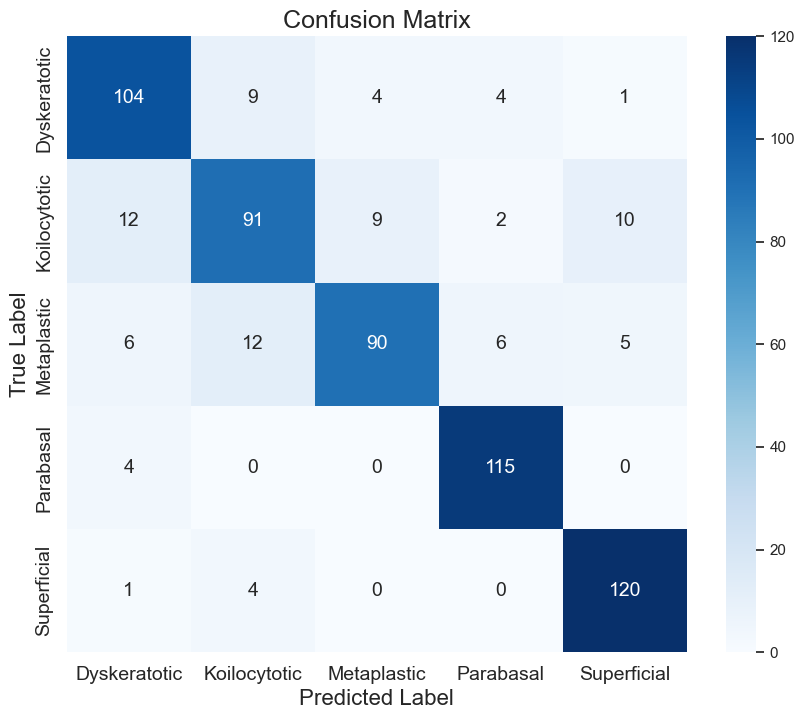


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.8189    0.8525    0.8353       122
            Koilocytotic     0.7845    0.7339    0.7583       124
             Metaplastic     0.8738    0.7563    0.8108       119
               Parabasal     0.9055    0.9664    0.9350       119
Superficial-Intermediate     0.8824    0.9600    0.9195       125

                accuracy                         0.8539       609
               macro avg     0.8530    0.8538    0.8518       609
            weighted avg     0.8526    0.8539    0.8516       609


Class: Dyskeratotic
True Positives (TP): 104
False Positives (FP): 23
False Negatives (FN): 18
True Negatives (TN): 464

Class: Koilocytotic
True Positives (TP): 91
False Positives (FP): 25
False Negatives (FN): 33
True Negatives (TN): 460

Class: Metaplastic
True Positives (TP): 90
False Positives (FP): 13
False Negatives (FN): 29
True Negatives (TN): 477

Class: Parabasal
T

In [5]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model resized/bestmodel_vgg16.h5'  # Sesuaikan dengan path model Anda
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class
for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# VGG19

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers[:-10]:
    layer.trainable = False
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) 
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

modelvgg19 = Model(pre_trained_model.input, x)

modelvgg19.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model resized/bestmodel_vgg19.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)

# Train the model
history = modelvgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 25s 246ms/step - loss: 1.6408 - accuracy: 0.2425 - val_loss: 2.2435 - val_accuracy: 0.1957
Epoch 2/50
88/88 [==============================] - 11s 125ms/step - loss: 1.4854 - accuracy: 0.3450 - val_loss: 2.0608 - val_accuracy: 0.2056
Epoch 3/50
88/88 [==============================] - 11s 123ms/step - loss: 1.2476 - accuracy: 0.5132 - val_loss: 3.1737 - val_accuracy: 0.2056
Epoch 4/50
88/88 [==============================] - 11s 125ms/step - loss: 1.0342 - accuracy: 0.6161 - val_loss: 4.3090 - val_accuracy: 0.3717
Epoch 5/50
88/88 [==============================] - 11s 123ms/step - loss: 0.8973 - accuracy: 0.6911 - val_loss: 5.5167 - val_accuracy: 0.2352
Epoch 6/50
88/88 [==============================] - 11s 124ms/step - loss: 0.8159 - accuracy: 0.7057 - val_loss: 6.6472 - val_accuracy: 0.2188
Epoch 7/50
88/88 [==============================] - 11s 126ms/step - loss: 0.7187 - accuracy: 0.7479 - val_loss: 1.5527 - val_accuracy: 0.4951

20/20 [==============================] - 1s 31ms/step


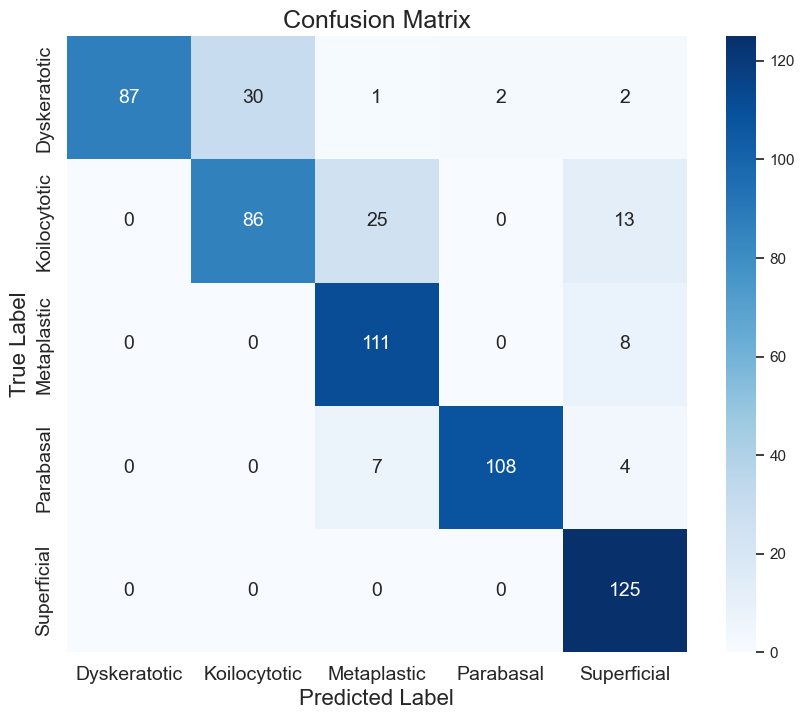


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     1.0000    0.7131    0.8325       122
            Koilocytotic     0.7414    0.6935    0.7167       124
             Metaplastic     0.7708    0.9328    0.8441       119
               Parabasal     0.9818    0.9076    0.9432       119
Superficial-Intermediate     0.8224    1.0000    0.9025       125

                accuracy                         0.8489       609
               macro avg     0.8633    0.8494    0.8478       609
            weighted avg     0.8625    0.8489    0.8472       609


Class: Dyskeratotic
True Positives (TP): 87
False Positives (FP): 0
False Negatives (FN): 35
True Negatives (TN): 487

Class: Koilocytotic
True Positives (TP): 86
False Positives (FP): 30
False Negatives (FN): 38
True Negatives (TN): 455

Class: Metaplastic
True Positives (TP): 111
False Positives (FP): 33
False Negatives (FN): 8
True Negatives (TN): 457

Class: Parabasal
Tru

In [6]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model resized/bestmodel_vgg19.h5'  # Sesuaikan dengan path model Anda
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class
for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# InceptionV3

In [3]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
    layer.trainable = False
x = pre_trained_model.get_layer("mixed7").output
x = GlobalMaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', name="dense_1024")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

modelInceptionV3 = Model(pre_trained_model.input, x)

modelInceptionV3.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model resized/bestmodel_InceptionV3.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelInceptionV3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 56s 606ms/step - loss: 1.7536 - accuracy: 0.4414 - val_loss: 1.0142 - val_accuracy: 0.5987
Epoch 2/50
88/88 [==============================] - 64s 732ms/step - loss: 1.1355 - accuracy: 0.6104 - val_loss: 0.6313 - val_accuracy: 0.7664
Epoch 3/50
88/88 [==============================] - 33s 375ms/step - loss: 0.9229 - accuracy: 0.6921 - val_loss: 0.5320 - val_accuracy: 0.7961
Epoch 4/50
88/88 [==============================] - 39s 446ms/step - loss: 0.8205 - accuracy: 0.7268 - val_loss: 0.5034 - val_accuracy: 0.8174
Epoch 5/50
88/88 [==============================] - 79s 902ms/step - loss: 0.8129 - accuracy: 0.7257 - val_loss: 0.4727 - val_accuracy: 0.8224
Epoch 6/50
88/88 [==============================] - 80s 919ms/step - loss: 0.7568 - accuracy: 0.7507 - val_loss: 0.4520 - val_accuracy: 0.8355
Epoch 7/50
88/88 [==============================] - 52s 596ms/step - loss: 0.6712 - accuracy: 0.7579 - val_loss: 0.4564 - val_accuracy: 0.8388

20/20 [==============================] - 1s 17ms/step


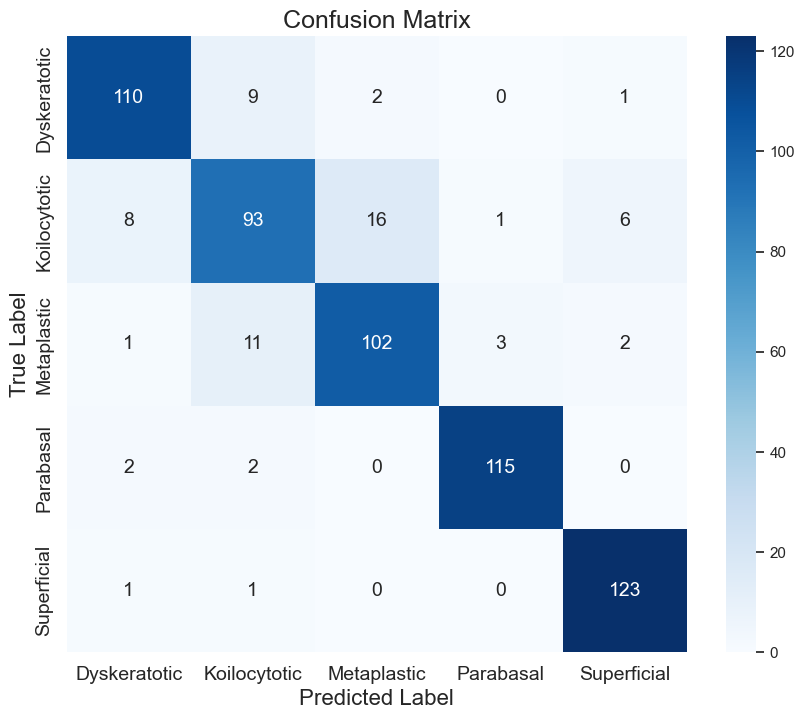


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9016    0.9016    0.9016       122
            Koilocytotic     0.8017    0.7500    0.7750       124
             Metaplastic     0.8500    0.8571    0.8536       119
               Parabasal     0.9664    0.9664    0.9664       119
Superficial-Intermediate     0.9318    0.9840    0.9572       125

                accuracy                         0.8916       609
               macro avg     0.8903    0.8918    0.8908       609
            weighted avg     0.8901    0.8916    0.8905       609


Class: Dyskeratotic
True Positives (TP): 110
False Positives (FP): 12
False Negatives (FN): 12
True Negatives (TN): 475

Class: Koilocytotic
True Positives (TP): 93
False Positives (FP): 23
False Negatives (FN): 31
True Negatives (TN): 462

Class: Metaplastic
True Positives (TP): 102
False Positives (FP): 18
False Negatives (FN): 17
True Negatives (TN): 472

Class: Parabasal


In [7]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model resized/bestmodel_InceptionV3.h5'  # Sesuaikan dengan path model Anda
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class
for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# DenseNet201

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalMaxPooling2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.DenseNet201(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
  layer.trainable = False
# Fine-tune beberapa lapisan terakhir
for layer in pre_trained_model.layers[-10:]:
    layer.trainable = True
x = pre_trained_model.get_layer("conv5_block16_concat").output
x = GlobalMaxPooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
x = Dense(2048, activation='relu', name="dense_2048")(x) 
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(5, activation='softmax')(x)

modelDenseNet201 = Model(pre_trained_model.input, x)

modelDenseNet201.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model resized/bestmodel_DenseNet201.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelDenseNet201.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 18s 149ms/step - loss: 0.9399 - accuracy: 0.6893 - val_loss: 1.4029 - val_accuracy: 0.7418
Epoch 2/50
88/88 [==============================] - 12s 134ms/step - loss: 0.4848 - accuracy: 0.8300 - val_loss: 1.1523 - val_accuracy: 0.7632
Epoch 3/50
88/88 [==============================] - 12s 135ms/step - loss: 0.3878 - accuracy: 0.8664 - val_loss: 0.8289 - val_accuracy: 0.8734
Epoch 4/50
88/88 [==============================] - 12s 135ms/step - loss: 0.3313 - accuracy: 0.8814 - val_loss: 0.5309 - val_accuracy: 0.9013
Epoch 5/50
88/88 [==============================] - 12s 135ms/step - loss: 0.3097 - accuracy: 0.9007 - val_loss: 0.3386 - val_accuracy: 0.9145
Epoch 6/50
88/88 [==============================] - 12s 135ms/step - loss: 0.2931 - accuracy: 0.8921 - val_loss: 0.2414 - val_accuracy: 0.9161
Epoch 7/50
88/88 [==============================] - 12s 135ms/step - loss: 0.2754 - accuracy: 0.9054 - val_loss: 0.2181 - val_accuracy: 0.9211

20/20 [==============================] - 2s 43ms/step


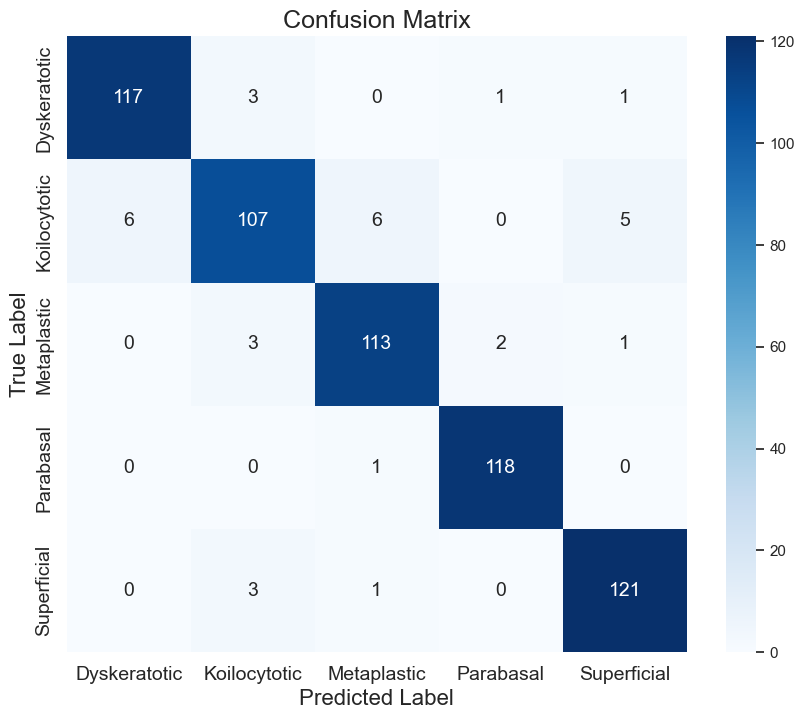


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9512    0.9590    0.9551       122
            Koilocytotic     0.9224    0.8629    0.8917       124
             Metaplastic     0.9339    0.9496    0.9417       119
               Parabasal     0.9752    0.9916    0.9833       119
Superficial-Intermediate     0.9453    0.9680    0.9565       125

                accuracy                         0.9458       609
               macro avg     0.9456    0.9462    0.9457       609
            weighted avg     0.9454    0.9458    0.9454       609


Class: Dyskeratotic
True Positives (TP): 117
False Positives (FP): 6
False Negatives (FN): 5
True Negatives (TN): 481

Class: Koilocytotic
True Positives (TP): 107
False Positives (FP): 9
False Negatives (FN): 17
True Negatives (TN): 476

Class: Metaplastic
True Positives (TP): 113
False Positives (FP): 8
False Negatives (FN): 6
True Negatives (TN): 482

Class: Parabasal
True

In [8]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model resized/bestmodel_DenseNet201.h5'  # Sesuaikan dengan path model Anda
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class
for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# XceptionNet

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
  layer.trainable = False
x = pre_trained_model.get_layer("block14_sepconv1_act").output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu', name="dense_1024")(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(5, activation='softmax')(x)

modelXception = Model(pre_trained_model.input, x)

modelXception.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model resized/bestmodel_Xception.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelXception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 30s 302ms/step - loss: 1.3948 - accuracy: 0.5396 - val_loss: 1.3088 - val_accuracy: 0.6678
Epoch 2/50
88/88 [==============================] - 19s 189ms/step - loss: 0.7989 - accuracy: 0.7186 - val_loss: 0.9759 - val_accuracy: 0.7467
Epoch 3/50
88/88 [==============================] - 18s 209ms/step - loss: 0.6581 - accuracy: 0.7854 - val_loss: 0.6723 - val_accuracy: 0.8191
Epoch 4/50
88/88 [==============================] - 18s 206ms/step - loss: 0.5813 - accuracy: 0.7957 - val_loss: 0.4858 - val_accuracy: 0.8503
Epoch 5/50
88/88 [==============================] - 60s 683ms/step - loss: 0.5219 - accuracy: 0.8296 - val_loss: 0.3775 - val_accuracy: 0.8750
Epoch 6/50
88/88 [==============================] - 162s 2s/step - loss: 0.4767 - accuracy: 0.8354 - val_loss: 0.3308 - val_accuracy: 0.8865
Epoch 7/50
88/88 [==============================] - 208s 2s/step - loss: 0.4831 - accuracy: 0.8289 - val_loss: 0.3063 - val_accuracy: 0.9030
Epo

20/20 [==============================] - 1s 18ms/step


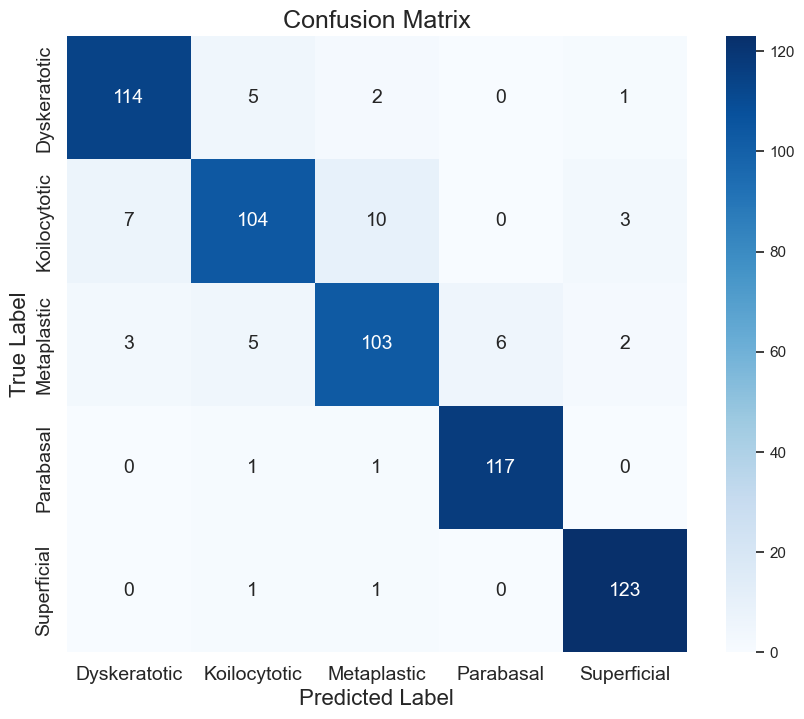


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9194    0.9344    0.9268       122
            Koilocytotic     0.8966    0.8387    0.8667       124
             Metaplastic     0.8803    0.8655    0.8729       119
               Parabasal     0.9512    0.9832    0.9669       119
Superficial-Intermediate     0.9535    0.9840    0.9685       125

                accuracy                         0.9212       609
               macro avg     0.9202    0.9212    0.9204       609
            weighted avg     0.9203    0.9212    0.9204       609


Class: Dyskeratotic
True Positives (TP): 114
False Positives (FP): 10
False Negatives (FN): 8
True Negatives (TN): 477

Class: Koilocytotic
True Positives (TP): 104
False Positives (FP): 12
False Negatives (FN): 20
True Negatives (TN): 473

Class: Metaplastic
True Positives (TP): 103
False Positives (FP): 14
False Negatives (FN): 16
True Negatives (TN): 476

Class: Parabasal


In [9]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model resized/bestmodel_Xception.h5'  # Sesuaikan dengan path model Anda
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class
for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")